> **作者**: Emmanuelle Gouillart

[scikit-image](http://scikit-image.org/)是专注于图像处理的Python包，并且使用原生的Numpy数组作为图像对象。本章描述如何在不同图像处理任务上使用`scikit-image`，并且保留了其他科学Python模块比如Numpy和Scipy的链接。

---
**也可以看一下：**对于基本图像处理，比如图像剪切或者简单过滤，大量简单操作可以用Numpy和SciPy来实现。看一下[使用Numpy和Scipy图像操作和处理部分](http://www.scipy-lectures.org/advanced/image_processing/index.html#basic-image)。

注意，在阅读本章之前你应该熟悉前面章节的内容，比如基础操作，比如面具和标签作为先决条件。

---

---
**章节内容**
- **介绍和观点**
    - `scikit-image` 和 `SciPy`生态系统
    - `scikit-image`能发现什么
- **输入/输出, 数据类型和 颜色空间**
    - 数据类型
    - 颜色空间
- **图像预处理/增强**
    - 本地过滤器
    - 非-本地过滤器
    - 数学形态学
- **图像细分**
    - 二元细分: 前景 + 背景
    - 基于标记的方法
- **测量区域的属性**
- **数据可视化和交互**

## 3.3.1 介绍和观点

图像是NumPy的数组`np.ndarray`

|图像:	|np.ndarray|
|--|--|
|像素:|array values: a[2, 3]|
|渠道:|array dimensions|
|图像编码:|dtype (np.uint8, np.uint16, np.float)|
|过滤器:|functions (numpy, skimage, scipy)|

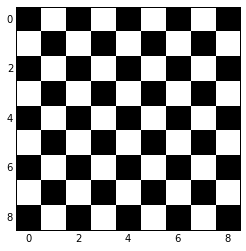

In [1]:
%matplotlib inline
import numpy as np
check = np.zeros((9, 9))
check[::2, 1::2] = 1
check[1::2, ::2] = 1
import matplotlib.pyplot as plt
plt.imshow(check, cmap='gray', interpolation='nearest') 

### 3.3.1.1 scikit-image 和 SciPy 生态系统

最新版的`scikit-image`包含在大多数的科学Python发行版中，比如，Anaconda或Enthought Canopy。它也包含在 Ubuntu/Debian。

In [3]:
import skimage
from skimage import data  # 大多数函数在子包中

大多数`scikit-image`函数用NumPy ndarrays作为参数

In [6]:
camera = data.camera()
camera.dtype

dtype('uint8')

In [7]:
camera.shape

(512, 512)

In [8]:
from skimage import restoration
filtered_camera = restoration.denoise_bilateral(camera)
type(filtered_camera)   

numpy.ndarray

其他Python包也可以用于图像处理，并且使用Numpy数组:
- [scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage) : 对于 nd-arrays。基础过滤、数学形态学和区域属性
- [Mahotas](http://luispedro.org/software/mahotas)
同时，强大的图形处理库有Python封装:
- [OpenCV](https://opencv-python-tutroals.readthedocs.org/en/latest/) (计算机视觉)
- [ITK](http://www.itk.org/itkindex.html) (3D图像和注册)
- 其他
(但是，他们没有那么Pythonic也没有Numpy友好，在一定范围)。

### 3.3.1.2 scikit-image能发现什么

- 网站: http://scikit-image.org/
- 例子库 (就像在 [matplotlib](http://matplotlib.org/gallery.html) 或 [scikit-learn](http://scikit-learn.org/)): http://scikit-image.org/docs/stable/auto_examples/ 不同类的函数，从基本的使用函数到高级最新算法。

- 过滤器: 函数将图像转化为其他图像。
    - NumPy组件
    - 通用过滤器算法
- 数据简化函数: 计算图像直方图、局部极值位置、角。
- 其他动作: I/O, 可视化，等。

## 3.3.2 输入/输出, 数据类型和颜色空间

I/O: [skimage.io](http://scikit-image.org/docs/stable/api/skimage.io.html#module-skimage.io)

In [4]:
from skimage import io

读取文件: [skimage.io.imread()](http://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imread)

In [7]:
import os
filename = os.path.join(skimage.data_dir, 'camera.png')
camera = io.imread(filename)

![](http://www.scipy-lectures.org/_images/plot_camera_1.png)

支持所有被Python Imaging Library（或者`imread` `plugin`关键词提供的任何I/O插件）的数据格式。
也支持URL图片路径:

In [3]:
logo = io.imread('http://scikit-image.org/_static/img/logo.png')

存储文件:

In [4]:
io.imsave('local_logo.png', logo)

(`imsave`也用外部插件比如PIL)

### 3.3.2.1 数据类型

![](http://www.scipy-lectures.org/_images/plot_camera_uint_1.png)

图像ndarrays可以用整数（有符号或无符号）或浮点来代表。

小心整数类型的溢出

In [8]:
camera = data.camera()
camera.dtype

dtype('uint8')

In [8]:
camera_multiply = 3 * camera

可用不同的整型大小: 8-, 16- 或 32-字节, 有符号或无符号。

---
一个重要的 (如果有疑问的话) `skimage` **惯例**: 图像浮点支持在[-1, 1] (与所以浮点图像相对)

---

In [9]:
from skimage import img_as_float
camera_float = img_as_float(camera)
camera.max(), camera_float.max()

(255, 1.0)

一些图像处理程序需要应用在浮点数组上，因此，输出的数组可能类型和数据范围都与输入数组不同

In [9]:
try:
    from skimage import filters
except ImportError:
    from skimage import filter as filters
camera_sobel = filters.sobel(camera)
camera_sobel.max() 

0.5915023652179584

---
在上面的例子中，我们使用`scikit-image`的子模块`filters`，在0.11到0.10版本间，`filter`被重命名为`filters`，为了避免与Python内置的`filter`冲突。

---

在[skimage](http://scikit-image.org/docs/stable/api/skimage.html#module-skimage)提供了下列skimage实用的函数来转化dtype和data range: `util.img_as_float`、 `util.img_as_ubyte`等。

看一下[用户手册](http://scikit-image.org/docs/stable/user_guide/data_types.html)来了解细节。

### 3.3.2.2 颜色空间

颜色图像是 (N, M, 3) 或 (N, M, 4) 形状 (当alpha渠道编码为透明度)


In [6]:
import scipy
face = scipy.misc.face()
face.shape

(768, 1024, 3)

[skimage.color](http://scikit-image.org/docs/stable/api/skimage.color.html#module-skimage.color)中包含转换不同颜色空间（RGB、HSV、LAB 等）的程序: `color.rgb2hsv`、color.lab2rgb等。检查一下文档字符串了解一下输入图像期望的dtype。

---
3D 图像
`skimage`的大多数函数可以接受3D图像作为参数。看一些文档字符串确认一下函数是否可以被用于3D图像（例如MRI或CT图像）。
---

---
练习

在硬盘上打开一个颜色图像作为Numpy数组。

找一个图像函数计算图像的直方图，并且打印每个颜色通道的直方图。

将图像转换为灰度图，打印直方图。
---

## 3.3.3 图像预处理 / 增强

目的: 降噪、特征 (边缘) 抽取 ...

### 3.3.3.1 本地过滤器

本地过滤器用一个函数替换像素临近像素的值。这个函数可以是线性或非线性的。

临近: 方块 (选择大小)、磁盘、或更复杂的结构化元素。

![](http://www.scipy-lectures.org/_images/kernels1.png)

In [ ]:
An important (if questionable) skimage convention: float images are supposed to lie in [-1, 1] (in order to have comparable contrast for all float images)

In [ ]:
3.3.1. Introduction and concepts

Images are NumPy’s arrays np.ndarray